# BLU04 - Time Series Concepts: Exercise notebook

Yay! Exercises! 

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import hashlib # for grading purposes
%matplotlib inline
import utils
from sklearn.impute import KNNImputer

### You're hired

You've been hired as the data scientist for a supermarket chain that wants to start extracting insights from their data. First, you'll start with a specific store.

Let's get our data:

In [2]:
store = utils.get_store_data()
store.head()

,date,customers
35439,31-01-2015,1398
15451,30-11-2013,1272
71816,10-01-2017,1732
70225,09-12-2016,1881
52180,28-12-2015,1775


## Exercise 1: Index and datetime

In [3]:
store.date

35439    31-01-2015
15451    30-11-2013
71816    10-01-2017
70225    09-12-2016
52180    28-12-2015
            ...    
24054    04-06-2014
52972    15-01-2016
45037    13-08-2015
47213    24-09-2015
28718    11-09-2014
Name: date, Length: 1661, dtype: object

#### 1.1) Make the index the datetime of the dates. 

In [4]:
# We expect the solution to be a dataframe

store['date'] = pd.to_datetime(store.date, infer_datetime_format=True)
store = store.set_index('date',drop=True)
store =  store.sort_index()
store

,customers
date,
2013-01-02,2111
2013-01-03,1833
2013-01-04,1863
2013-01-05,1509
2013-01-06,520
...,...
2017-07-27,1729
2017-07-28,1848
2017-07-29,1251


In [5]:
expected_hash = '660d9054fe3a6cbcfb77e2647932e3c41ff5acab9fc4d162fdc448c7c8e6ccc2'
assert hashlib.sha256(str(store.iloc[28].name).encode()).hexdigest() == expected_hash
assert hashlib.sha256(str(store.index.dtype).encode()).hexdigest() == '261738f2e43a1c47a16f043b46deb993943d61f4a2bbe5ef4b03c3fb1af362b5'


# clue: if this assert is failing, and your iloc[25].name is '2017-01-7', 
# then you are missing the "best practices" part. 
# What did we say in the Learning notebook about this? 

## Exercise 2: Time series preprocessing

#### 2.1) Look out for duplicate timestamps (ungraded)

When working with time series, we should make sure we don't have more than one possible value for the same timestamp. How would you check if there are any duplicates?

In [6]:
## UNGRADED CELL
# use this cell to write your code
# how would you look for duplicate timestamps?
store_dup = store.index.duplicated(keep='first').sum()
store_dup
#store.loc['2017-07-28']


0

#### 2.2) Accounting for missing days

Sometimes datasets don't have rows corresponding to all timestamps, as a data scientist you should know if this is the case. Copy `store` to a new variable called `store_complete`, with no gap days. Fill the missing data with nulls.

In [7]:
int_max =store.index.max()
int_min =store.index.min()

In [8]:
store.customers

date
2013-01-02    2111
2013-01-03    1833
2013-01-04    1863
2013-01-05    1509
2013-01-06     520
              ... 
2017-07-27    1729
2017-07-28    1848
2017-07-29    1251
2017-07-30     519
2017-07-31    1872
Name: customers, Length: 1661, dtype: int64

In [9]:
# copy store to store_complete
store_complete = store.copy()
store_complete = store_complete.reindex(pd.date_range(start = int_min, end = int_max ))
store_complete.isnull().sum()
# change store_complete index so that it contains each of the days in the time range [2013-01-02, 2017-07-31]
# fill missing data with nulls
#store_complete = 


customers    11
dtype: int64

In [10]:
#### check number of nulls
assert store_complete.isnull().sum()[0] != 0, "You have 0 null values in the dataset! Remember that each missing day should correspond to a null in customers."
assert store_complete.isnull().sum()[0] == 11, "You should have found 11 days with missing data, no more no less."

#### check store_complete dataframe integrity
assert store_complete.shape[0] != 1676, "Did you fill the index with the missing days?"
assert store_complete.shape[0] == 1672, "The number of rows is not the expected."
assert store_complete.shape[1] == 1, "You shouldn't change the number of columns."
assert str(store_complete[store_complete.customers.isnull()].index[6])[:10] == '2016-01-01', "Do you have all the missing days? Is the index is ordered?"

## Exercise 3: Working with timestamps

#### 3.1) Worst day in 2016

What was the worst day in terms of customers in 2016?

In [11]:
# hint: the answer should be a timestamp
#store_complete[ (store_complete.customers == store_complete.loc['2016'].min() ) ]
worst_day_2016 = store_complete.index[(store_complete.customers == store_complete.customers.loc['2016'].min() )][0]
worst_day_2016
#store_complete.customers == store_complecustomerste.loc['2016']

Timestamp('2016-01-04 00:00:00', freq='D')

In [12]:
#worst_day_2016=store_complete[(store_complete.customers == store_complete.customers.loc['2016'].min() )]
#worst_day_2016.index[0]

In [13]:
expected_hash = '54ca8373016eeb8acb093f60f9d909b8fc1bcc8e37d9f762530df4053bb83a1d'
assert hashlib.sha256(str(worst_day_2016).encode()).hexdigest() == expected_hash

print(f"The worst day in 2016 was {worst_day_2016.day} of {worst_day_2016.month_name()}. Talk about new year's blues !")

The worst day in 2016 was 4 of January. Talk about new year's blues !


#### 3.2) Best Friday

Last Friday there were 3000 customers, and your boss said he's never seen such a high count of customers on a Friday. To check if your boss is correct, can you find the maximum number of customers that we've ever had on a Friday?

- _hint #1: you can use the methods at the bottom of this [page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) directly on the index_  
- _hint #2: when operating directly on the index, you do not need to use `.dt` to use the methods_

In [14]:
store_complete.index[ (store_complete.index.dayofweek == 4) & 
              (store_complete.customers >3000)][0]


Timestamp('2016-12-23 00:00:00', freq='D')

In [15]:
max_customers_Friday = store_complete.customers[ (store_complete.index.dayofweek == 4) & 
              (store_complete.customers >3000)][0]


In [16]:
expected_hash = 'b134ce47a896876fe3111bfed26cbe06363ede8a60ada5f70fe285d04fc4b7e9'
assert hashlib.sha256(str(int(max_customers_Friday)).encode()).hexdigest() == expected_hash

print(f"Yep! The highest count we ever had on a Friday was {int(max_customers_Friday)} customers. Don't tell your boss.")

Yep! The highest count we ever had on a Friday was 3023 customers. Don't tell your boss.


## Exercise 4: Time series methods

#### 4.1) Shopping rush

A new pandemic has started, and everyone came to buy soap and isopropyl alcohol. Your boss swears to have never seen such an absolute increase in customers from one day to the next - "Yesterday there were 100 customers, today there were 5000."

To confirm if what your boss is saying is true, can you find the maximum increase in customers from one day to the next?

In [17]:

max_increase = store_complete.customers.diff().max()



In [18]:
expected_hash = 'aa4b0d224e2b4488c6e3c5692347a0e26322d86dcb6bf01ab937e15d76037ee4'
assert hashlib.sha256(str(int(max_increase)).encode()).hexdigest() == expected_hash

#### 4.2) Bad month

Despite the shopping rush of the last few days, we had a bad month , with a monthly sum of customers < 45000 . What was the last month we had less than 45000 customers  (`last_bad_month`)?

In [19]:
store_M = store_complete.copy()

In [20]:
# We expect the answer to be a monthly time period (freq='M'), so answers  
# which are of the form "the second month of the year" will not pass the grader. 
# hint: by default pandas uses freq='M'.

store_M=store_M.resample('m').sum()
last_bad_month=store_M.index[ store_M.customers <45000 ][-1]


In [21]:
expected_hash = '50aa98c99f36b286c0269526800c2fc49253f75fcdef0cf02f4db4aee064ddbc'
assert hashlib.sha256(str(last_bad_month).encode()).hexdigest() == expected_hash

---

### Congrats!

Your work is proving useful, so your boss has asked to expand your analysis to the whole chain. 

Let's get the new data:

In [22]:
chain = utils.get_stores_data()
chain.head()

,date,store_nbr,customers
40929,23-05-2015,6,2053
19072,17-02-2014,2,1766
38092,26-03-2015,15,1336
46726,14-09-2015,35,637
8972,14-07-2013,44,4383


In [23]:
print('We now have %0.0f data points. Wooooow!' % len(chain))

We now have 82678 data points. Wooooow!


The thing is, we can't just set the index to be the day, as we now have multiple stores on the same day. 

Looks like we have to go into multi-indexing...

## Exercise 5: Multi-indexing

#### 5.1) make the date into a datetime, and then set the index to be `[date, store_nbr]`

In [24]:
chain['date'] = pd.to_datetime(chain.date, infer_datetime_format=True)
chain =  chain.set_index(['date', 'store_nbr'])
chain = chain.sort_index()



In [25]:
assert hashlib.sha256(str(chain.index.get_level_values(0).dtype).encode()).hexdigest() == \
        '261738f2e43a1c47a16f043b46deb993943d61f4a2bbe5ef4b03c3fb1af362b5', "First level of index should be a datetime!"
assert hashlib.sha256(str(chain.index.get_level_values(0)).encode()).hexdigest() ==  \
        'ea3a4358e60ac9e478fd489b4ea9a3e2ebe0256e823b416125cf544160073b1f', "Is the index sorted? Never forget to sort your time series."
assert hashlib.sha256(str(chain.index.get_level_values(1)).encode()).hexdigest() ==  \
        'c602dc5ca179ea4f0f7d09e14dcd28a5cbdce1571acd6040357a513c0f70d53a', "Check if you selected the correct values for the second level."

#### 5.2) Customers on shop 10, April 2016

What's the maximum daily number of customers, on store 10, on April 2016?

In [26]:
idx = pd.IndexSlice 

max_store10 = chain.loc[idx ['April 2016', 10],:].max()[0]



In [27]:
expected_hash = 'f76cb816b3f74ecf30d387c64869038ac163fe26f8aabd727c1071dd567fc3d5'
assert hashlib.sha256(str(max_store10).encode()).hexdigest() == expected_hash

print(f"Correct! The maximum daily number of customers on April 2016 was {max_store10}.")

Correct! The maximum daily number of customers on April 2016 was 1532.


#### 5.3) how many new stores opened in 2015, given that no existing stores closed in 2015?

In [28]:
# hint : Check number of stores at last day of each year.


nr_stores_2014 = chain.loc[idx ['31 December 2014', : ], :]
nr_stores_2015 = chain.loc[idx ['31 December 2015', : ], :]

 
nr_stores_opened_2015 = nr_stores_2015.size - nr_stores_2014.size



In [29]:
expected_hash = 'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d'
assert hashlib.sha256(str(nr_stores_opened_2015).encode()).hexdigest() == expected_hash

#### 5.4) Record number of customers

Find the total number of customers in 2015 in each store. The result should be a pandas dataframe where the index corresponds to the `store_nbr` and the values to the corresponding sum of customers on record for 2015.

In [30]:
chain

customers
date       store_nbr           
2013-01-01 25               770
2013-01-02 1               2111
           2               2358
           3               3487
           4               1922
...                         ...
2017-07-31 50              2593
           51              1572
           52              2206
           53              1065
           54               860

[82678 rows x 1 columns]

In [31]:
nr_stores_2015 = chain.loc[idx ['2015', : ], :]
sum_per_store_2015 = nr_stores_2015.groupby(level='store_nbr').customers.sum().to_frame()

#sum_per_store_2015
#chain.loc[sum_per_store_2015]

In [32]:
assert sum_per_store_2015.shape[0] == 53, "There should be 53 stores in record_per_store's index."
expected_hash_1 = '6e941f790715b03b4634bdc0d844ab7743caaf05d633b71eb6e01f2efa95d777'
expected_hash_2 = 'a2fcf2b0fb1b2b76eac8ed32e88fb3de06d460db4e7c606efe3dc5dc09588a0a'
assert hashlib.sha256(str(sum_per_store_2015.iloc[5, :].values[0]).encode()).hexdigest() == expected_hash_1
assert hashlib.sha256(str(sum_per_store_2015.iloc[35, :].values[0]).encode()).hexdigest() == expected_hash_2

print(f"Good job!! Also, the store with the highest count of customers in 2015 was store {sum_per_store_2015.idxmax()[0]}, with a total of {sum_per_store_2015.max()[0]} customers. Now that's a lot of customers!...")

Good job!! Also, the store with the highest count of customers in 2015 was store 44, with a total of 1593523 customers. Now that's a lot of customers!...


## Exercise 6: Time series modelling concepts

#### 6.1) Store 10

You've been asked to make an analysis on store 10. You remember what you learned on time series  at that awesome Academy in 2022. Let's impress your boss!

#### 6.1.1)  Preprocessing

Let's select all data for store 10, and make sure that we have all consecutive days in our time series.

- Using cross sections, select the data for store `10` from `chain`, and store it in **a new dataframe called `store_10`**, with an index corresponding to the dates and a column with the values in `customers`.

- Make sure you have a continuous datetime index, like we did before. Fill the values for any  missing days with nulls.

In [33]:
store_10 = chain.xs(10,
                   level = 'store_nbr',
                   drop_level=True)

int_max =store_10.index.max()
int_min =store_10.index.min()

store_10= store_10.reindex(pd.date_range(start = int_min, end = int_max ))


In [34]:
assert store_10.shape != (1660, 1), "Did you forget to make the index continuous?"
assert store_10.shape == (1672, 1), "There should be 1672 timepoints, including nulls, in store_10."
expected_hash = '40962624bfc236888ff8a68a74b0c30166b7245423520bb28196b67f57d5e332'
assert hashlib.sha256(str(int(store_10.loc['2015-02-16'][0])).encode()).hexdigest() == expected_hash, "Did you change any values?"
assert store_10.isnull().sum()[0] == 12, "The values for missing days should be filled as nulls."

#### 6.1.2) Seasonality on store 10

Does the total number of customers that go to store 10 have a stronger weekly or bi-weekly seasonality?

In [35]:
# hint 1 : we expect you to use correlation as a proxy for seasonality. 
# the grader expects you to use the pandas method for correlation

# hint 2 : use a positive shift

# the 2 variables below should be of type pandas.core.series.Series
store_10_series = store_10.squeeze()

sales_per_day_week_before = store_10_series.shift(+7)
sales_per_day_2_weeks_before = store_10_series.shift(+14)

# the 2 variables below should be floats
weekly_corr = store_10_series.corr(sales_per_day_week_before)
biweekly_corr = store_10_series.corr(sales_per_day_2_weeks_before)

# YOUR CODE HERE


In [36]:
sales_per_day_week_before.to_frame()


,customers
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
2013-01-06,NaN
...,...
2017-07-27,780.0
2017-07-28,781.0
2017-07-29,999.0
2017-07-30,836.0


In [37]:
assert int(sales_per_day_week_before.loc['2016-01-02']) == int(sales_per_day_2_weeks_before.loc['2016-01-09']), "Did you shift the data correctly?"
np.testing.assert_almost_equal(weekly_corr, 0.66, decimal=2, err_msg="Are you using the pandas method for correlation?")
np.testing.assert_almost_equal(biweekly_corr, 0.56, decimal=2, err_msg="Are you using the pandas method for correlation?")

Based on your findings, you conclude the weekly seasonality is stronger than the bi-weekly seasonality on store 10.

#### 6.2) Which stores have negative trend?

You were very fast and impressed your boss. The problem is: now your boss wants you to dive deeper and analyze all stores data. He wants to know **which stores have negative trends.**

Hint : the answer should be a list of unique store numbers (integers) sorted by increasing order.

Not going home earlier after all, are we?

[-0.16798492]


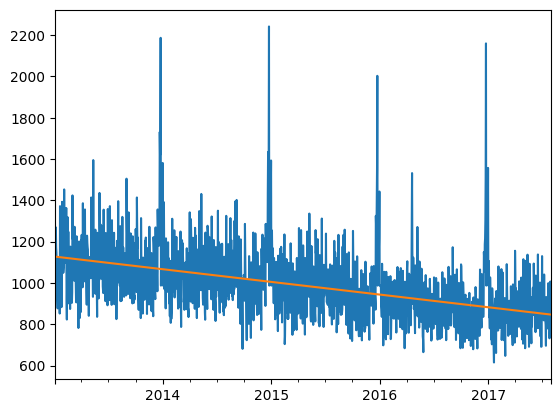

In [38]:
store_x = chain.xs(10,
                    level = 'store_nbr',
                    drop_level=True)

int_max =store_x.index.max()
int_min =store_x.index.min()
data= store_x.reindex(pd.date_range(start = int_min, end = int_max ))

imputer = KNNImputer(n_neighbors=2)
                        
data_imputed = imputer.fit_transform(data)
    
df_imputed = pd.DataFrame(data_imputed, index=data.index, columns=data.columns)
data = df_imputed.squeeze().copy()
    
X = data.reset_index().index.values.reshape(-1, 1)  

slr = LinearRegression(fit_intercept=True)
slr.fit(X, data)

linear_trend = pd.Series(slr.predict(X), index=data.index)

data.plot(label="original data");
linear_trend.plot(label="linear trend")
print(slr.coef_)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
stores = []
for s in chain.index.get_level_values(1):
    if s not in stores :
        stores.append(s)

In [40]:
# This one is a bit harder and there are several ways to solve it. For this reason the
# body of the solution is not presented as in the previous questions. 

# A few clues:
# Remember that you have all stores data inside the variable `chain`.
# Most solutions are going to require a for loop to run through the various stores
# Assume linear trends, where the trend is characterized by the slope of the linear regression
# This is just an EDA, we're not building a predictive model, so you don't need to split your dataset
# For each store time series you create, don't forget to **fill the missing dates using a `KNNImputer`**.


# stores_neg_trend = 


In [50]:
dic = {}
lis = []
for store in stores :
    
    store_x = chain.xs(store,
                       level = 'store_nbr',
                       drop_level=True)

    int_max =store_x.index.max()
    int_min =store_x.index.min()

    data= store_x.reindex(pd.date_range(start = int_min, end = int_max ))

    imputer = KNNImputer(n_neighbors=1)
                        
    data_imputed = imputer.fit_transform(data)
    
    df_imputed = pd.DataFrame(data_imputed, index=data.index, columns=data.columns)
    data = df_imputed.squeeze().copy()
    
    X = data.reset_index().index.values.reshape(-1, 1)  

    slr = LinearRegression(fit_intercept=True)

    slr.fit(X, data)

    linear_trend = pd.Series(slr.predict(X), index=data.index)
    slope = slr.coef_[0]
    #print(slr.coef_[0])
    if ( slope <= 0 ):
        dic[store]= slr.coef_[0]
    #print(dic)
        
    
    dic = dict(sorted(dic.items(), key=lambda item: item[0] , reverse =False))
    lis = []
    for s in dic :
        lis.append(s)
#print(store_x , slr.coef_)
stores_neg_trend = sorted(lis)
len(lis)
lis

[1,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 18,
 19,
 20,
 21,
 23,
 24,
 26,
 30,
 32,
 33,
 34,
 37,
 38,
 39,
 46,
 48,
 50,
 51,
 52,
 54]

In [51]:
expected_hash = 'd10932831240fb4c00bfe0dec352f334a4798d8424cc91bfa3c9eeec0e4e0939'
assert hashlib.sha256(str(stores_neg_trend).encode()).hexdigest() == expected_hash

print("Correct! Your boss is ecstatic about your work and decides to give you a 200% raise!...\nWho cares about going home earlier after all?")

Correct! Your boss is ecstatic about your work and decides to give you a 200% raise!...
Who cares about going home earlier after all?


---